In [1]:
import numpy as np 
import random
import matplotlib.pyplot as plt
from mlxtend.data import loadlocal_mnist
from keras.utils import to_categorical

/Users/chakryaros/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Import Mnist Dataset

- MNIST is a collection of handwritten digits ranging from the number 0 to 9.

- It has a training set of 60,000 images, and 10,000 test images that are classified into corresponding categories or labels.

In [2]:
train_images_filepath = 'dataset/mnist_dataset/train-images.idx3-ubyte'
train_labels_filepath = 'dataset/mnist_dataset/train-labels.idx1-ubyte'
test_images_filepath = 'dataset/mnist_dataset/t10k-images.idx3-ubyte'
test_labels_filepath = 'dataset/mnist_dataset/t10k-labels.idx1-ubyte'

In [3]:
X_train, y_train = loadlocal_mnist( train_images_filepath, train_labels_filepath)
X_test, y_test = loadlocal_mnist(test_images_filepath, test_labels_filepath)

In [4]:
print("The shape of of X_train: ", X_train.shape)
print("The shape of of y_train: ", y_train.shape)

The shape of of X_train:  (60000, 784)
The shape of of y_train:  (60000,)


In [5]:
print("The shape of of X_test: ", X_test.shape)
print("The shape of of y_test: ", y_test.shape)

The shape of of X_test:  (10000, 784)
The shape of of y_test:  (10000,)


## Data visualization on Minist Dataset

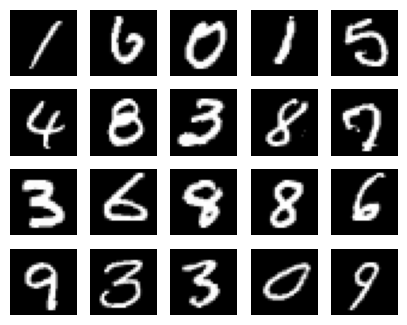

In [6]:
# sample 20 mnist digits from train dataset
x = X_train.reshape(60000, 28, 28)
indexes = np.random.randint(0, x.shape[0], size=20)
images = x[indexes]
labels = y_train[indexes]


# plot the 20 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.close('all')

In [ ]:
# compute the number of labels
num_labels = len(np.unique(y_train))

X_train = X_train.reshape(60000, 28, 28)
X_test = X_test.reshape(10000, 28, 28)
print("The shape of of X_tain after reshape: ", X_train.shape)
print("The shape of of y_test after reshape: ", X_test.shape)

# convert to one-hot vector
y_train_vector = to_categorical(y_train, num_labels)
y_test_vector = to_categorical(y_test, num_labels)
print("The shape of of X_tain after convert to one-hot vector: ", y_train_vector.shape)
print("The shape of of y_test after convert to one-hot vector: ", y_test_vector.shape)

## Building and Training the Classification CNN

### Importing the Keras libraries and packages

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adagrad

### Initialising the ANN

In [11]:
cnn_model = Sequential()

### Add layers

In [1]:
# First convolutional layer.
cnn_model.add(tf.keras.layers.Conv2D(128, (3, 3), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(tf.keras.layers.MaxPooling2D((2, 2)))

# Second convolutional layer.
cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(tf.keras.layers.MaxPooling2D((2, 2)))
cnn_model.add(tf.keras.layers.Flatten())
cnn_model.add(tf.keras.layers.Dense(32, activation='relu'))
# Output.
cnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

NameError: name 'cnn_model' is not defined

### Model summary

In [13]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        51,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,634 (494.66 KB)

 Trainable params: 126,634 (494.66 KB)

 Non-trainable params: 0 (0.00 B)

## Build and Compare Adam optimizer with other optimizers

In [14]:
def build_model(x_train, y_train, optimizer, model):
    print("Opimizer: ", optimizer)
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics = ['accuracy'])
    history = model.fit(x_train, y_train, batch_size=128, epochs=15)
    return model, history

In [ ]:
adam_cnn_model, adam_cnn_history = build_model(X_train, y_train_vector, Adam(), cnn_model)
rmsprop_cnn_model, rmsprop_cnn_history = build_model(X_train, y_train_vector, RMSprop(), cnn_model)
adagrad_cnn_model, adagrad_cnn_history = build_model(X_train, y_train_vector, 
                                                     Adagrad(), cnn_model)
sgd_cnn_model, sgd_cnn_history = build_model(X_train, y_train_vector, 
                                             SGD(), cnn_model)

Opimizer:  <keras.src.optimizers.adam.Adam object at 0x3081fd370>
Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy: 0.6673 - loss: 1.8818
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.9637 - loss: 0.1250
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - accuracy: 0.9786 - loss: 0.0711
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - accuracy: 0.9844 - loss: 0.0515
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - accuracy: 0.9874 - loss: 0.0420
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - accuracy: 0.9896 - loss: 0.0337
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - accuracy: 0.9917 - loss: 0.0270
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.9918 - loss: 0.0271
Epoch 9/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.9930 - loss: 0.0219
Epoch 10/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - accuracy: 0.9924 - loss: 0.0235
Epoch 11/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/ste

### Evaluate the model on the test set

In [15]:
loss, acc = adam_cnn_model.evaluate(X_test, y_test_vector, batch_size=32)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9882 - loss: 0.0814

Test accuracy: 99.0%


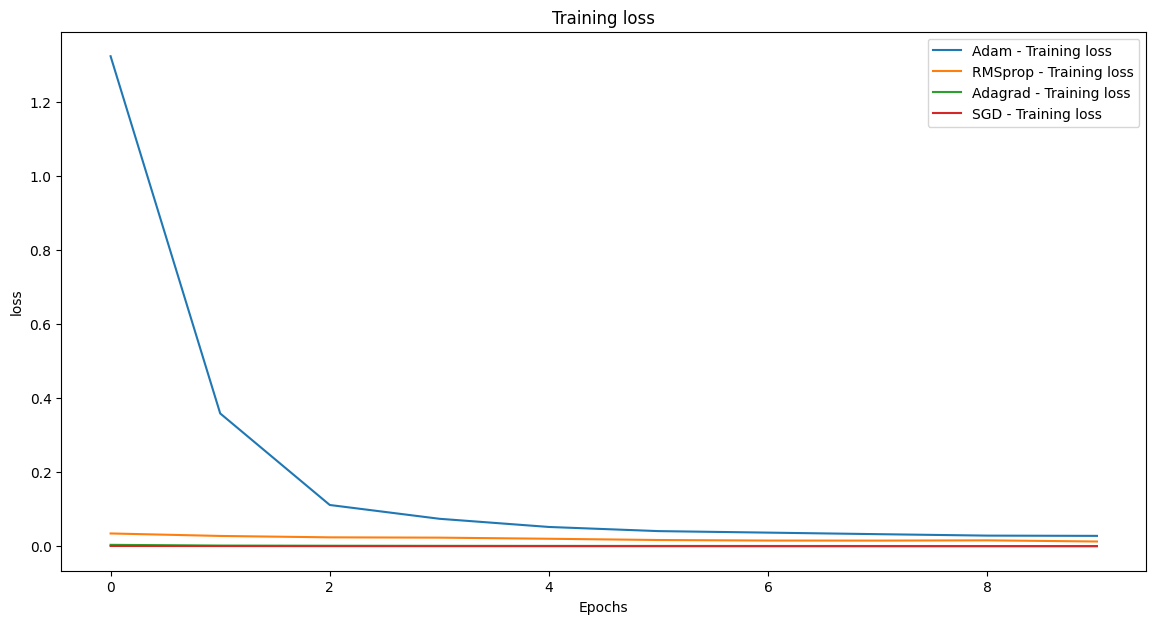

In [16]:
# Function to plot training loss
def plot_loss(histories, optimizer_names):
    plt.figure(figsize=(14, 7))
    
    for history, name in zip(histories, optimizer_names):
        plt.plot(history.history['loss'], label=f'{name} - Training loss')
    
    plt.title('Training loss')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

# Plot the results
histories = [adam_cnn_history, rmsprop_cnn_history, adagrad_cnn_history, sgd_cnn_history]
plot_loss(histories, ['Adam', 'RMSprop', 'Adagrad', 'SGD'])


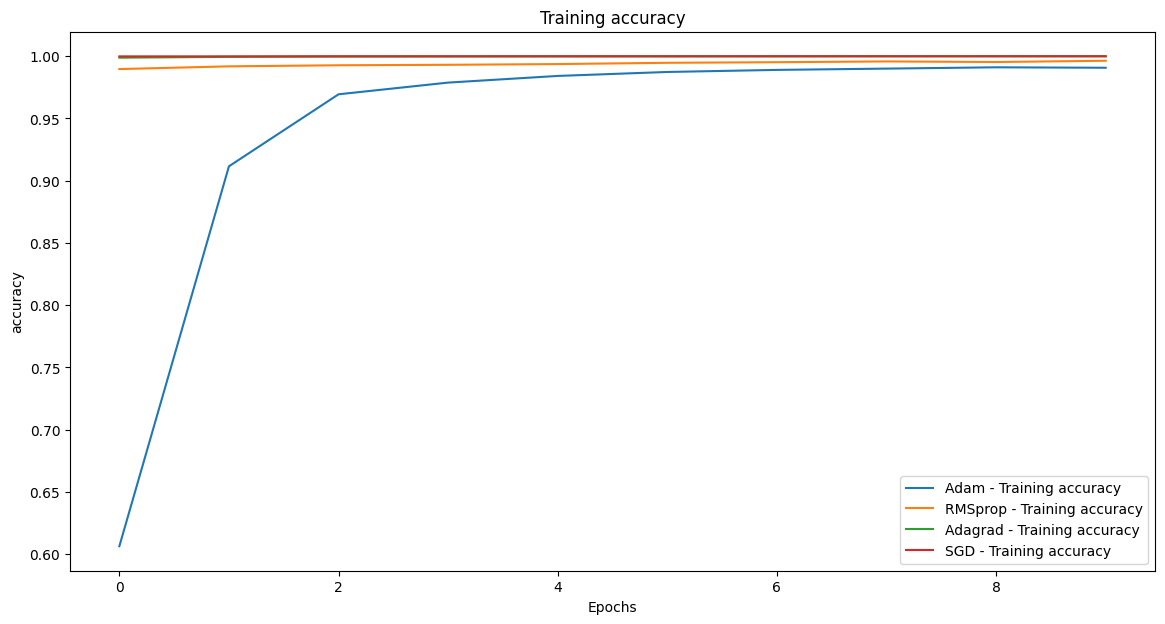

In [17]:
# Function to plot training accuracy
def plot_accuracy(histories, optimizer_names):
    plt.figure(figsize=(14, 7))
    
    for history, name in zip(histories, optimizer_names):
        plt.plot(history.history['accuracy'], label=f'{name} - Training accuracy')
    
    plt.title('Training accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

plot_accuracy(histories, ['Adam', 'RMSprop', 'Adagrad', 'SGD'])